#### Extra analysis

This is to document ``extracurricular'' runs that we performed for sanity checks, verification, or brainstorming bigger jobs

In [1]:
# autoreload magic
%reload_ext autoreload
%autoreload 2


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from mindreadingautobots.analysis.analysis_config import SPREADSHEET_NAMES, BF_VALS, NAME_TEMPLATES, DATASET_NAMES
from mindreadingautobots.analysis.analysis_config import spreadsheet_to_dataframe
target_directory = "../processed/"

### Check 1: how good is my hyperparameter sweep for the LSTMs? 

Questions:
 - what is the distribution of LSTM performances at bf=0; is it comparable to transformers?
 - why does transformer do especially poorly on unbalanced (even k) majority?
 - Does adjusting LSTM hyperparameters significantly change the error vs entropy plots?

In [5]:
df_all_30_4 = pd.read_csv(f"{target_directory}sparse_majority_31_4.csv")
df_ana_30_4 = pd.read_csv(f"{target_directory}sparse_majority_31_4_ana.csv")

df_all_20_5 = pd.read_csv(f"{target_directory}sparse_majority_21_5.csv")
df_ana_20_5 = pd.read_csv(f"{target_directory}sparse_majority_21_5_ana.csv")

df_all_40_5 = pd.read_csv(f"{target_directory}sparse_majority_41_5.csv")
df_ana_40_5 = pd.read_csv(f"{target_directory}sparse_majority_41_5_ana.csv")

df_all_50_3 = pd.read_csv(f"{target_directory}sparse_majority_51_3.csv")
df_ana_50_3 = pd.read_csv(f"{target_directory}sparse_majority_51_3_ana.csv")



In [6]:
# get bf=30 values for df_all_40_5
san_40_5 = df_all_40_5[df_all_40_5["bf"] == 30][df_all_40_5["model"] == "SAN"]["noiseless_val_acc"].values.flatten()
san_30_4 = df_all_30_4[df_all_30_4["bf"] == 31.9][df_all_30_4["model"] == "SAN"]["noiseless_val_acc"].values.flatten()
san_20_5 = df_all_20_5[df_all_20_5["bf"] == 30][df_all_20_5["model"] == "SAN"]["noiseless_val_acc"].values.flatten()
san_50_3 = df_all_50_3[df_all_50_3["bf"] == 31.9][df_all_50_3["model"] == "SAN"]["noiseless_val_acc"].values.flatten()

rnn_40_5 = df_all_40_5[df_all_40_5["bf"] == 30][df_all_40_5["model"] == "RNN"]["noiseless_val_acc"].values.flatten()
rnn_30_4 = df_all_30_4[df_all_30_4["bf"] == 31.9][df_all_30_4["model"] == "RNN"]["noiseless_val_acc"].values.flatten()
rnn_20_5 = df_all_20_5[df_all_20_5["bf"] == 30][df_all_20_5["model"] == "RNN"]["noiseless_val_acc"].values.flatten()
rnn_50_3 = df_all_50_3[df_all_50_3["bf"] == 31.9][df_all_50_3["model"] == "RNN"]["noiseless_val_acc"].values.flatten()

C:\Users\peter\AppData\Local\Temp\ipykernel_15552\2453212077.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  san_40_5 = df_all_40_5[df_all_40_5["bf"] == 30][df_all_40_5["model"] == "SAN"]["noiseless_val_acc"].values.flatten()
C:\Users\peter\AppData\Local\Temp\ipykernel_15552\2453212077.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  san_30_4 = df_all_30_4[df_all_30_4["bf"] == 31.9][df_all_30_4["model"] == "SAN"]["noiseless_val_acc"].values.flatten()
C:\Users\peter\AppData\Local\Temp\ipykernel_15552\2453212077.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  san_20_5 = df_all_20_5[df_all_20_5["bf"] == 30][df_all_20_5["model"] == "SAN"]["noiseless_val_acc"].values.flatten()
C:\Users\peter\AppData\Local\Temp\ipykernel_15552\2453212077.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  san_50_3 = df_all_50_3[df_all_50_3["bf"] == 31.9][df_all_50_3["mode

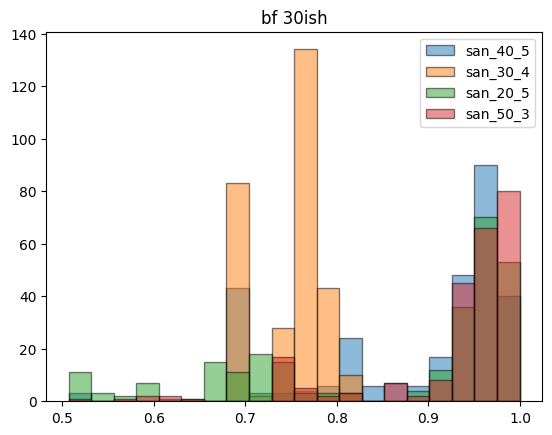

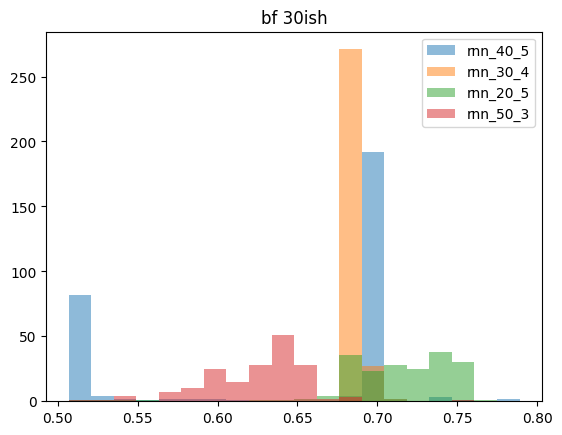

In [7]:
# histogram of all 4 san values
cts, bins, _ = plt.hist(san_40_5, bins=20, alpha=0.5, edgecolor='k', label='san_40_5')
plt.hist(san_30_4, bins=bins, alpha=0.5, edgecolor='k', label='san_30_4')
plt.hist(san_20_5, bins=bins, alpha=0.5, edgecolor='k', label='san_20_5')
plt.hist(san_50_3, bins=bins, alpha=0.5, edgecolor='k', label='san_50_3')
# title is the bf value
plt.title(f"bf 30ish")
plt.legend()
plt.show()

# histogram of all 4 rnn values
cts, bins, _ = plt.hist(rnn_40_5, bins=20, alpha=0.5, label='rnn_40_5')
plt.hist(rnn_30_4, bins=bins, alpha=0.5, label='rnn_30_4')
plt.hist(rnn_20_5, bins=bins, alpha=0.5, label='rnn_20_5')
plt.hist(rnn_50_3, bins=bins, alpha=0.5, label='rnn_50_3')
plt.legend()
plt.title(f"bf 30ish")

plt.show()


### Extra analysis: The effect of LSTM hyperparameter changes on the transformer best vs. median comparison

In [11]:
# download the latest smajority data

SPREADSHEET_NAME = "sparse_majority_51_3_rerun"
bf_vals = [11.1, 14.8, 19.2]
sheetname_template = NAME_TEMPLATES[2]
df_51_3_rerun = spreadsheet_to_dataframe(SPREADSHEET_NAME, bf_vals, sheetname_template, models=["RNN"])
# df.to_csv(f"./processed/{SPREADSHEET_NAME}.csv", index=False)

Loading: RNN_sparse_majority_k3_nbits51_n2000_bf11.1_seed1234_results
Loading: RNN_sparse_majority_k3_nbits51_n2000_bf14.8_seed1234_results
Loading: RNN_sparse_majority_k3_nbits51_n2000_bf19.2_seed1234_results


In [10]:
df_51_3 = pd.read_csv(f"{target_directory}{SPREADSHEET_NAMES[2]}.csv")

bf=11.1, original max=0.8109025559
bf=11.1, new max=0.8474440895
bf=14.8, original max=0.9188298722
bf=14.8, new max=0.8004193291
bf=19.2, original max=0.7839456869
bf=19.2, new max=0.9063498403


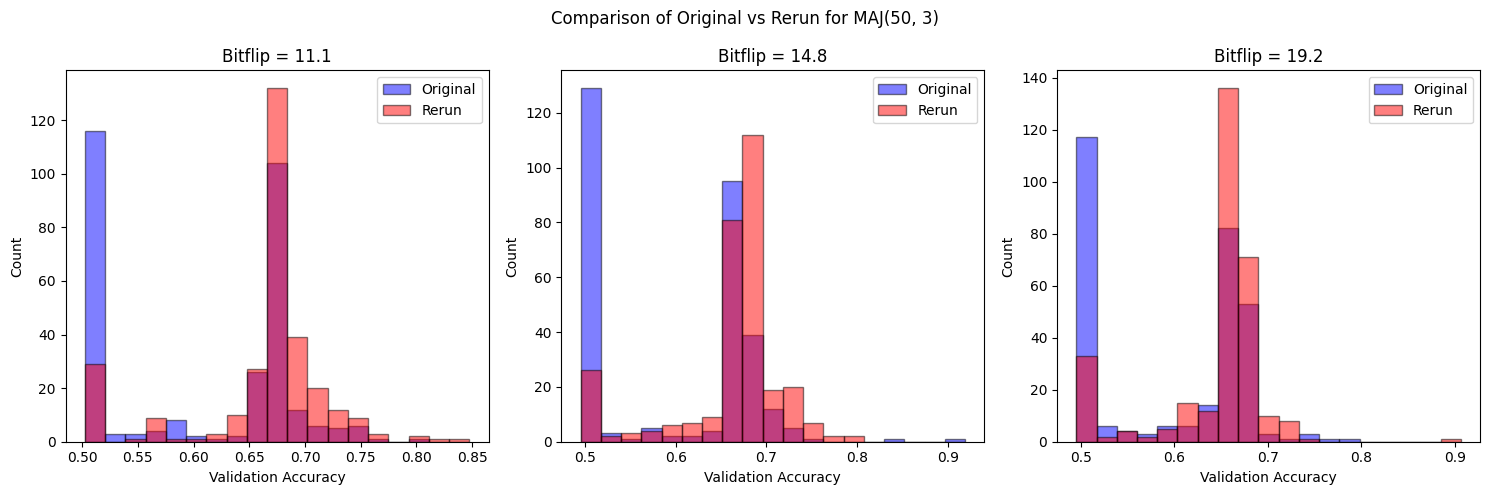

In [14]:
# For each bf in bf_vals, compare df["val_acc"] distribution for df_51_3_rerun versus df_51_3
# Create three plots, one for each bf value
import matplotlib.pyplot as plt

# Filter the dataframes for RNN model only since we only have RNN in the rerun
bf_vals_to_compare = [11.1, 14.8, 19.2]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Comparison of Original vs Rerun for MAJ(50, 3)")

for i, bf in enumerate(bf_vals_to_compare):
    # Filter original data
    original_data = df_51_3[(df_51_3["bf"] == bf) & (df_51_3["model"] == "RNN")]["noiseless_val_acc"].values
    rerun_data = df_51_3_rerun[(df_51_3_rerun["bf"] == bf) & (df_51_3_rerun["model"] == "RNN")]["noiseless_val_acc"].values
    ax = axes[i]
    
    # Determine common bins for both datasets
    all_data = np.concatenate([original_data, rerun_data])
    bins = np.linspace(min(all_data), max(all_data), 20)
    print(f"bf={bf}, original max={max(original_data)}")
    print(f"bf={bf}, new max={max(rerun_data)}")
    
    # Plot histograms
    ax.hist(original_data, bins=bins, alpha=0.5, label='Original', color='blue', edgecolor='black')
    ax.hist(rerun_data, bins=bins, alpha=0.5, label='Rerun', color='red', edgecolor='black')
    
    # Add labels and title
    ax.set_xlabel('Validation Accuracy')
    ax.set_ylabel('Count')
    ax.set_title(f'Bitflip = {bf}')
    ax.legend()

plt.tight_layout()
plt.show()



##### Analysis notes:
 - TODO: Set up these plots, but also with transformer distribution, and for noiseless and noisy validation acc
 - Including the new data from these runs has virtually no effect on the main body MAJ plots, so we're good there. Just want to include a transparent description in the appendix. e.g. in the caption, "These results are not particular sensitive to the choice of LSTM hyperparameters, see Appendix ? for more details on hyperparameter tuning and distributions..."


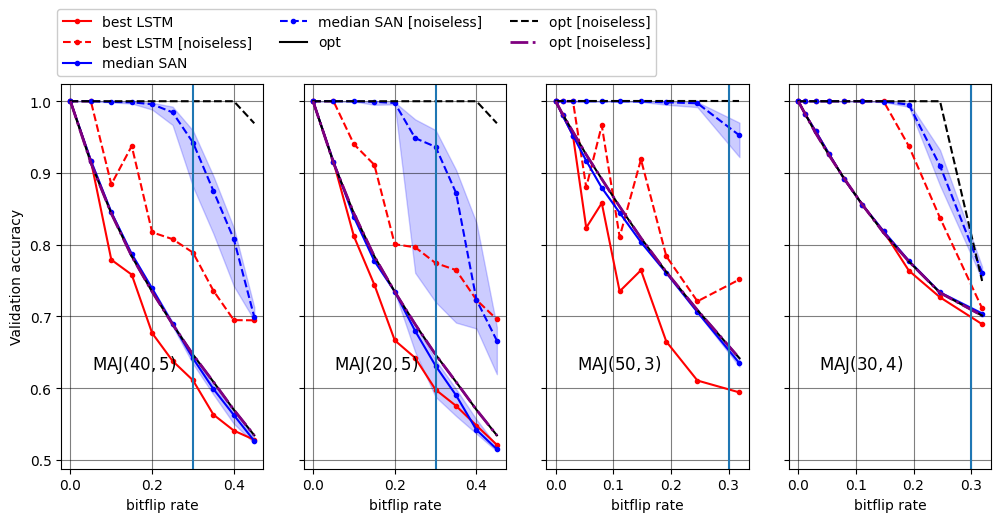

In [ ]:

def append_last(x, y):
    return (x, y)
    # return np.concatenate((x, [1])).flatten(), np.concatenate((y, [0.5])).flatten()


fig, axes = plt.subplots(1, 4, figsize=(12, 5), sharey=True)


for j in range(len(SPREADSHEET_NAMES[:4])):
    ax = axes[j]
    # Read the CSV file into a DataFrame
    bf_vals = BF_VALS[j]
    df_all = pd.read_csv(f"{target_directory}{SPREADSHEET_NAMES[j]}.csv")
    df_ana = pd.read_csv(f"{target_directory}{SPREADSHEET_NAMES[j]}_ana.csv")

    rnn_stats = np.zeros((len(bf_vals), 8)) # val_acc median, q1, q3, max_val_acc, noiseless_val_acc median, q1, q3, max_noiseless_val_acc
    san_stats = np.zeros((len(bf_vals), 8))

    stats_dct = {
        "RNN": rnn_stats,
        "SAN": san_stats
    }

    for k in stats_dct.keys():
        for i, bf in enumerate(bf_vals):
            df = df_all.loc[df_all["bf"] == bf].loc[df_all["model"] == k]
            stats_dct[k][i, 0] = df['val_acc'].median()
            stats_dct[k][i, 1] = df['val_acc'].quantile(0.35)
            stats_dct[k][i, 2] = df['val_acc'].quantile(0.85)
            stats_dct[k][i, 3] = df['val_acc'].max()
            stats_dct[k][i, 4] = df['noiseless_val_acc'].median()
            stats_dct[k][i, 5] = df['noiseless_val_acc'].quantile(0.33)
            stats_dct[k][i, 6] = df['noiseless_val_acc'].quantile(0.67)
            stats_dct[k][i, 7] = df['noiseless_val_acc'].max()

    # xvals = df_ana["entropy"].values.flatten() # entropy x-axis
    xvals = df_ana["bf"].values.flatten() # bitflip x-axis
    mle_noisy_final = df_ana["mle_noisy"].values.flatten()

    rnn_noisy = np.array(stats_dct["RNN"][:,3]).flatten()
    rnn_noiseless = np.array(stats_dct["RNN"][:,7]).flatten()
    san_noisy = np.array(stats_dct["SAN"][:,0]).flatten()
    san_noiseless = np.array(stats_dct["SAN"][:,4]).flatten()
    san_q1 = np.array(stats_dct["SAN"][:,1]).flatten()
    san_q3 = np.array(stats_dct["SAN"][:,2]).flatten()
    san_q1_noiseless = np.array(stats_dct["SAN"][:,5]).flatten()
    san_q3_noiseless = np.array(stats_dct["SAN"][:,6]).flatten()

    # plot but show the points at each values 
    ax.plot(*append_last(xvals, rnn_noisy), label='best LSTM', c='r', ls='-', marker='.')
    ax.plot(*append_last(xvals, rnn_noiseless), label='best LSTM [noiseless]', c='r', ls='--', marker='.')

    ax.plot(*append_last(xvals, san_noisy), label='median SAN', c='b', ls='-', marker='.')
    ax.plot(*append_last(xvals, san_noiseless), label='median SAN [noiseless]', c='b', ls='--', marker='.')
    ax.fill_between(xvals, san_q1, san_q3, color='b', alpha=0.2)
    ax.fill_between(xvals, san_q1_noiseless, san_q3_noiseless, color='b', alpha=0.2)

    ax.plot(*append_last(xvals, mle_noisy_final), label='opt', c='k', ls='-')
    # ax.plot([0, 0.5, 0.5], [1, 1, 0.5], label='opt [noiseless]', c='k', ls='--')
    all_mle_noiseless = df_ana["mle_noiseless"].values.flatten()
    ax.plot(*append_last(xvals, all_mle_noiseless), label='opt [noiseless]', c='k', ls='--')
    all_mle_noisy = df_ana["mle_noisy"].values.flatten()
    ax.plot(*append_last(xvals, all_mle_noisy), label='opt [noiseless]', c='purple', ls='-.', lw=2)

    ax.set_xlabel('bitflip rate')
    ax.text(0.15, 0.3, DATASET_NAMES[j], ha='left', va='top', fontsize=12, transform=ax.transAxes)
    ax.axvline(.30)
    ax.grid( c='k', alpha=0.5)

axes[0].set_ylabel('Validation accuracy')
axes[0].legend(prop={'size': 10}, framealpha=1, ncol=3, loc='lower left', bbox_to_anchor=(-0.02, 1.02), borderaxespad=0.)



### Extra analysis: Sparse majority SAN overfit test

Here we just check whether SAN can actually overfit the data, i.e. are the hyperparameters "good enough" to perfectly fit the noisy training data? Below we see that the model's eventual capacity to overfit is basically uncorrelated with its validation accuracy, i.e. the models do not perform better just on account of being underparameterized in some way that makes it hard for them to overfit the data.

TODO:
 - how do I actually visualize and implement this argument?

In [24]:
SPREADSHEET_NAME = "sparse_majority_41_5_SAN_overfit_test"
bf_vals = [10, 20]
sheetname_template = NAME_TEMPLATES[0]
df_41_5_rerun = spreadsheet_to_dataframe(SPREADSHEET_NAME, bf_vals, sheetname_template, models=["SAN"])


Loading: SAN_sparse_majority_k5_nbits41_n2000_bf10_seed1234
Loading: SAN_sparse_majority_k5_nbits41_n2000_bf20_seed1234


Text(0.5, 0.98, 'training accuracy after ??? epochs')

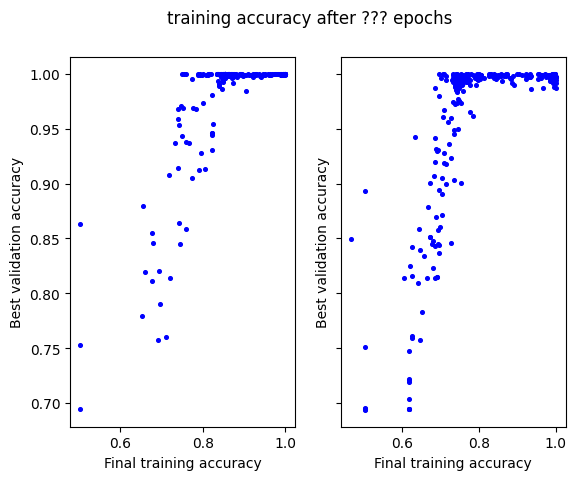

In [32]:
fig, axes = plt.subplots(1, 2, sharey=True)

for i, bf in enumerate(bf_vals):
    x = df_41_5_rerun[df_41_5_rerun["bf"]==bf]["final_train_acc"].values
    y = df_41_5_rerun[df_41_5_rerun["bf"]==bf]["noiseless_val_acc"].values
    axes[i].scatter(x, y, c='b', s=7)
    axes[i].set_ylabel("Best validation accuracy")
    axes[i].set_xlabel("Final training accuracy")
fig.suptitle(f"training accuracy after ??? epochs")

In [19]:
df_41_5 = pd.read_csv(f"{target_directory}{SPREADSHEET_NAMES[0]}.csv")